In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../Dataset/iRent去識別化數據(僅供本次賽事使用)_20220627/iRent車輛行駛GPS數據.csv')
print(df.shape)
df.head()

(101099163, 6)


,iRent1,iRent2,iRent3,iRent4,iRent5,iRent6
0,54964354,2021-04-05 15:52:16.0000000,25.139969,121.801906,28429.0,0
1,54964354,2021-04-05 15:52:19.0000000,25.139969,121.801906,28429.0,0
2,54964354,2021-04-05 15:54:43.0000000,25.139969,121.801906,0.0,0
3,54964354,2021-04-05 15:58:43.0000000,25.139969,121.801906,0.0,0
4,54964354,2021-04-05 16:02:43.0000000,25.139969,121.801906,0.0,0


In [15]:
df_354 = df.loc[df['iRent1'] == 54964354]
df_354 = df_354.drop_duplicates(subset='iRent3', keep="first")
df_354 = df_354.sort_values(by=['iRent2'])

In [42]:
df_099 = df.loc[df['iRent1'] == 54965099]
df_099 = df_099.drop_duplicates(subset='iRent3', keep="first")
df_099 = df_099.sort_values(by=['iRent2'])

In [43]:
df_426 = df.loc[df['iRent1'] == 54965426]
df_426 = df_426.drop_duplicates(subset='iRent3', keep="first")
df_426 = df_426.sort_values(by=['iRent2'])

In [41]:
df.loc[df['iRent1'] == 54965426]

,iRent1,iRent2,iRent3,iRent4,iRent5,iRent6
676,54965426,2021-04-05 14:50:24.0000000,25.057869,121.614631,0.0,0
677,54965426,2021-04-05 14:50:24.0000000,25.057869,121.614631,0.0,0
678,54965426,2021-04-05 14:50:25.0000000,25.057869,121.614631,41761.0,0
679,54965426,2021-04-05 14:50:24.0000000,25.057869,121.614631,0.0,0
680,54965426,2021-04-05 14:50:25.0000000,25.057869,121.614631,41761.0,0
...,...,...,...,...,...,...
930,54965426,2021-04-05 15:31:48.0000000,25.073128,121.359569,0.0,0
931,54965426,2021-04-05 15:31:50.0000000,25.073128,121.359569,41791.0,0
932,54965426,2021-04-05 15:31:51.0000000,25.073128,121.359569,41791.0,0
933,54965426,2021-04-05 15:31:53.0000000,25.073128,121.359569,41791.0,0


In [58]:
from gmplot import *  

firstGmap = gmplot.GoogleMapPlotter(25.10, 121.50, 18)  
firstGmap.draw( "firstmap.html" )  

In [38]:
df[df['iRent3'] > 24.9].iRent1.unique()

array([54964354, 54965099, 54965426, ..., 75379387, 75380182, 75380353])

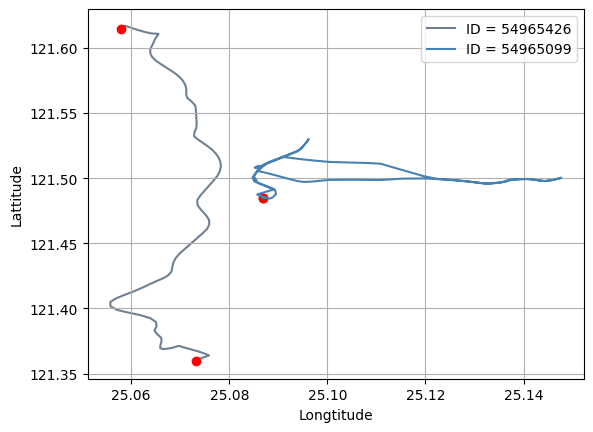

In [54]:
fig, ax = plt.subplots()
#markers_on = [12, 17, 18, 19]
plt.plot(df_426['iRent3'], df_426['iRent4'], c = 'slategrey', zorder = 1)
plt.plot(df_099['iRent3'], df_099['iRent4'], c = 'steelblue')
plt.xlabel("Longtitude")
plt.ylabel("Lattitude")
plt.legend(["ID = 54965426", "ID = 54965099"], loc ="upper right")

ax.scatter(df_426['iRent3'].iloc[0], df_426['iRent4'].iloc[0], marker='o', color='red')
ax.scatter(df_426['iRent3'].iloc[-1], df_426['iRent4'].iloc[-1], marker='o', color='red')

ax.scatter(df_099['iRent3'].iloc[0], df_099['iRent4'].iloc[0], marker='o', color='red')
ax.scatter(df_099['iRent3'].iloc[-1], df_099['iRent4'].iloc[-1], marker='o', color='red')

plt.legend(["ID = 54965426", "ID = 54965099"], loc ="upper right")
ax.grid()
plt.show()

fig.savefig('Trans_route.png', transparent=True)

In [25]:
df_381 = df.loc[df['iRent1'] == 83239381]

In [5]:
df.iRent1.value_counts()

83239381     32532
84362630     31309
38441092     30821
110226551    30177
40902740     25147
             ...  
105680982        1
55501557         1
50750806         1
131651500        1
67481758         1
Name: iRent1, Length: 407926, dtype: int64

Data Preprocessing

In [7]:
df = df[(df.iRent5 != 0) & (df.iRent6 != 0)]
df.shape

(45924445, 6)

In [11]:
df.head()

,iRent1,iRent2,iRent3,iRent4,iRent5,iRent6
9,54964354,2021-04-05 18:16:00.0000000,25.103403,121.740836,28439.0,68
10,54964354,2021-04-05 18:16:30.0000000,25.104692,121.736164,28439.0,33
15,54964354,2021-04-05 18:19:00.0000000,25.104828,121.734847,28439.0,32
16,54964354,2021-04-05 18:19:30.0000000,25.106108,121.730844,28440.0,53
17,54964354,2021-04-05 18:20:00.0000000,25.105136,121.725294,28441.0,89
